# openpyxl 练习题

Excel文件[world_bank_population.xlsx](https://github.com/ruc-python/2017fall/blob/master/data/world_bank_population.xlsx)由世界银行提供，记录了各个国家从1960年至2016年的人口数据。
1. 俄罗斯（Russian Federation）首次出现人口下降是哪一年？
2. 中国（China）年人口增长率的平均值是多少？哪些年份的人口增长率低于平均值？

~~3. 世界人口年增长率是多少？中国有哪些年份的人口增长率低于当年的世界人口增长率？~~

年人口增长率(t)=人口(t)／人口(t-1)-1


假定年平均增长率为$x$，则有下列等式

$N_0(1+x)^T = N_T$

$x = \frac{N_T}{N_0}^{\frac{1}{T}}-1$

## 获取数据

In [1]:
from openpyxl import load_workbook

wb = load_workbook('data/world_bank_population.xlsx')
ws = wb.active
target = 'Russian Federation'
years = [ws.cell(row=5, column=i).value for i in range(5, ws.max_column+1)]
for row in range(6, ws.max_row+1):
    c = ws.cell(row=row, column=1)
    if c.value == target:
        numbers = [ws.cell(row=row, column=i).value for i in range(5, ws.max_column+1)]
        break
print len(numbers)

57


## 画图

Populating the interactive namespace from numpy and matplotlib


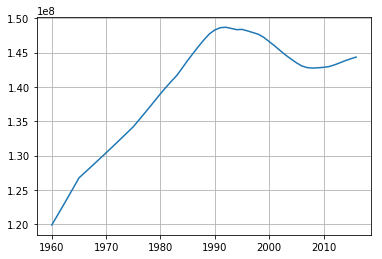

In [2]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(years, numbers)
plt.grid()

## 画大图

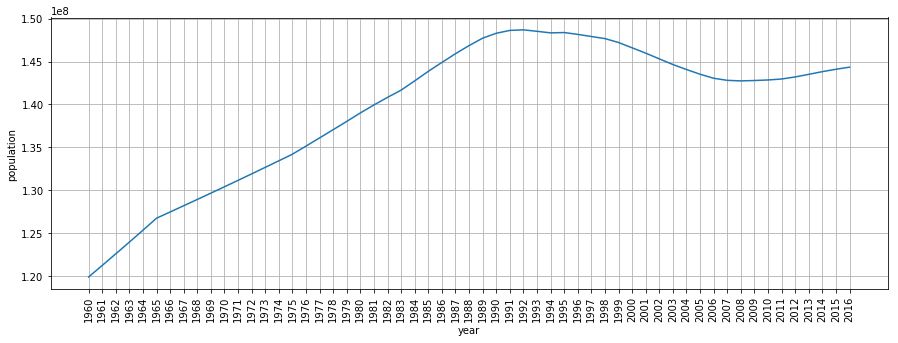

In [3]:
plt.figure(figsize=(15,5))

line, = plt.plot(np.arange(len(years)), numbers)
plt.xlabel('year')
plt.ylabel('population')

ax = plt.gca()
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(years) 

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.grid()

Populating the interactive namespace from numpy and matplotlib
avg growth rate of China: 0.0130794
avg growth rate of China: 0.0130483


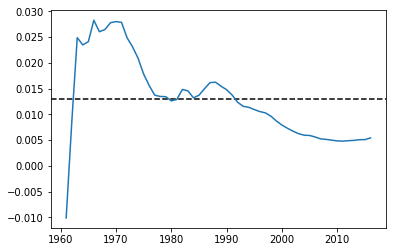

In [4]:
%pylab inline
import matplotlib.pyplot as plt
from openpyxl import load_workbook

wb = load_workbook('data/world_bank_population.xlsx')
ws = wb.active
target = 'Russian Federation'
target = 'China'
years = [ws.cell(row=5, column=i).value for i in range(5, ws.max_column+1)]
for row in range(6, ws.max_row+1):
    c = ws.cell(row=row, column=1)
    if c.value == target:
        numbers = [ws.cell(row=row, column=i).value for i in range(5, ws.max_column+1)]
        break

growth_rate = []
for i in range(1, len(years)):
    increase = numbers[i]/float(numbers[i-1]) - 1.0 
    growth_rate.append(increase)

avg_growth_rate = np.mean(growth_rate)
print 'avg growth rate of %s: %g' % (target, avg_growth_rate)

# N_0 * (1+avg_rate)^T = N_T ==> avg_rate = (N_T/N_0)^{1/T}-1
T = len(numbers)-1
avg_growth_rate = np.power(numbers[-1]/float(numbers[0]), 1.0/T) - 1
print 'avg growth rate of %s: %g' % (target, avg_growth_rate)

plt.axhline(y=avg_growth_rate, color='k', linestyle='--')
plt.plot(years[1:], growth_rate)


## Nice format

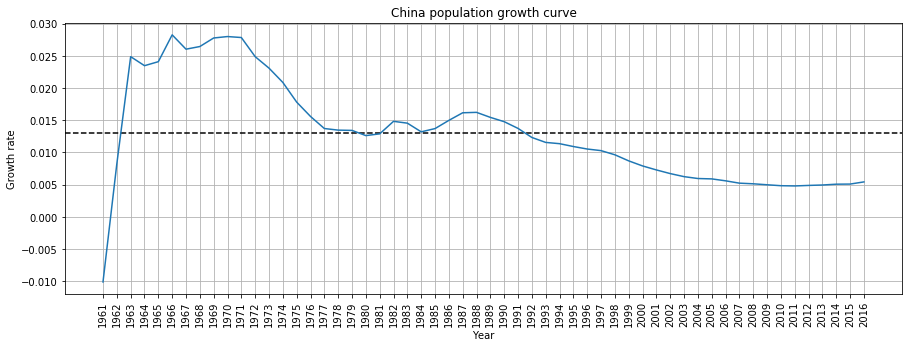

In [5]:
next_years = years[1:]

plt.figure(figsize=(15,5))

plt.axhline(y=avg_growth_rate, color='k', linestyle='--')
plt.plot(range(len(next_years)), growth_rate)

ax = plt.gca()
ax.set_xticks(np.arange(len(next_years)))
ax.set_xticklabels(next_years) #, minor=True)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Growth rate')
plt.title('China population growth curve')

Populating the interactive namespace from numpy and matplotlib


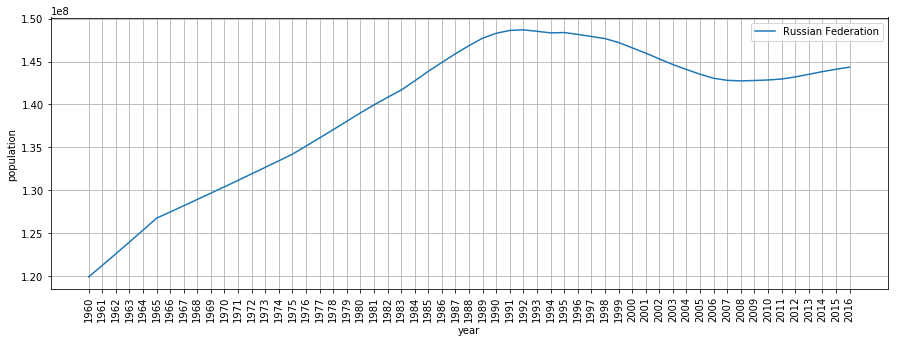

In [6]:
%pylab inline
import matplotlib.pyplot as plt
from openpyxl import load_workbook

wb = load_workbook('data/world_bank_population.xlsx')
ws = wb.active
country_list = ['China', 'India', 'Russian Federation']
country_list = ['Russian Federation']

data = {}

years = [ws.cell(row=5, column=i).value for i in range(5, ws.max_column+1)]
for row in range(6, ws.max_row+1):
    c = ws.cell(row=row, column=1)
    if c.value in country_list:
        numbers = [ws.cell(row=row, column=i).value for i in range(5, ws.max_column+1)]
        data[c.value] = numbers

plt.figure(figsize=(15,5))

num_country = len(country_list)
lines = [None] * num_country
for i in range(num_country):
    lines[i], = plt.plot(np.arange(len(years)), data[country_list[i]])
#(line1, ) = plt.plot(years, data['China'])
#(line2, ) = plt.plot(years, data['India'])
plt.xlabel('year')
plt.ylabel('population')

ax = plt.gca()
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(years) #, minor=True)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.grid()
plt.legend(lines, country_list)

In [7]:
from openpyxl import load_workbook

wb = load_workbook('data/world_bank_population.xlsx')
ws = wb.active
target = 'Russian Federation'
years = [ws.cell(row=5, column=i).value for i in range(5, ws.max_column+1)]
for row in range(6, ws.max_row+1):
    c = ws.cell(row=row, column=1)
    if c.value == target:
        numbers = [ws.cell(row=row, column=i).value for i in range(5, ws.max_column+1)]
        break
print len(numbers)

target = 'China'
for row in range(6, ws.max_row+1):
    c = ws.cell(row=row, column=1)
    if c.value == target:
        numbers2 = [ws.cell(row=row, column=i).value for i in range(5, ws.max_column+1)]
        break
print len(numbers2)

57
57


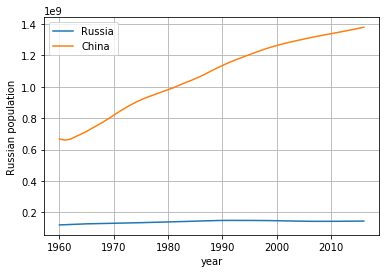

In [8]:
fig, ax1 = plt.subplots() #(nrows=2,ncols=2)
(line1, ) = ax1.plot(years, numbers)
(line2, ) = ax1.plot(years, numbers2)
ax1.grid()
ax1.set_xlabel('year')
ax1.set_ylabel('Russian population')
ax1.legend([line1, line2], ['Russia', 'China'])

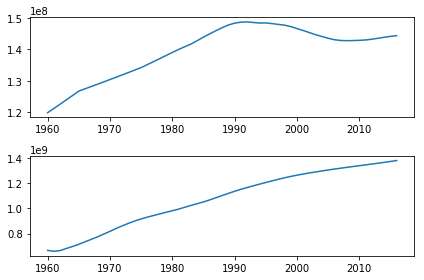

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=1)
(line1, ) = axes[0].plot(years, numbers)
(line2, ) = axes[1].plot(years, numbers2)
ax1.grid()
ax1.set_xlabel('year')
ax1.set_ylabel('Russian population')
fig.tight_layout()

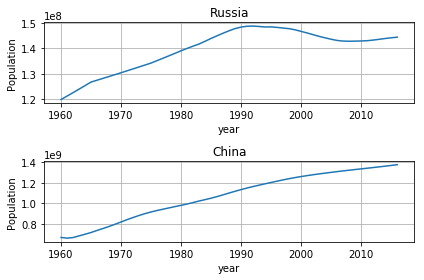

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=1)
pops = [numbers, numbers2]
names = ['Russia', 'China']
for i in range(len(axes)):
    ax = axes[i]
    (line1, ) = ax.plot(years, pops[i])
    ax.grid()
    ax.set_xlabel('year')
    ax.set_ylabel('Population')
    ax.set_title(names[i])
fig.tight_layout()

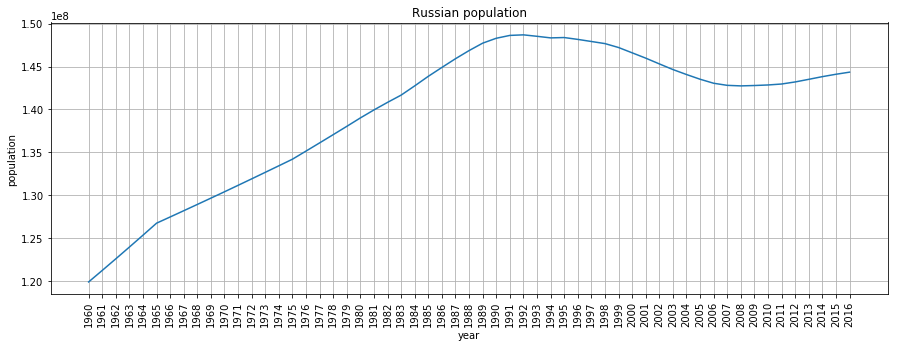

In [11]:
fig, ax = plt.subplots(figsize=(15,5))

line, = ax.plot(np.arange(len(years)), numbers)
ax.set_xticks(np.arange(len(years)))
ax.set_xticklabels(years) 

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_xlabel('year')
ax.set_ylabel('population')
ax.set_title('Russian population')
ax.grid()

### 双坐标

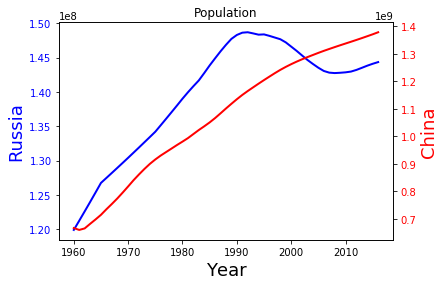

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(years, numbers, lw=2, color="blue")
ax1.set_ylabel("Russia", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(years, numbers2, lw=2, color="red")
ax2.set_ylabel("China", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel('Year', fontsize=18)
ax1.set_title('Population')